In [2]:
# pycharmでjupyter notebookを使う方法
# https://blog.jetbrains.com/ja/2019/11/30/2396/

import pandas as pd
import matplotlib.pyplot as plt
# ダークモードの場合、設定しないとメモリが見えなくなる
plt.style.use('dark_background')

import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import poisson,binom
import math


In [2]:
# https://github.com/aviatesk/intro-statistical-modeling/edit/master/data/data6a.csv
df = pd.read_csv('../data/data6a.csv')
df.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [3]:
# N: 観察種子数
# y: 生存種子数
# x: 植物のサイズ
# f: C:肥料なし, T: 肥料あり(施肥[せひ]というらしい)

df.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [4]:
# カテゴリが何件入っているか見る
df["f"].value_counts()

T    50
C    50
Name: f, dtype: int64

In [5]:
# 型確認
df.dtypes

N      int64
y      int64
x    float64
f     object
dtype: object

<AxesSubplot:xlabel='x', ylabel='y'>

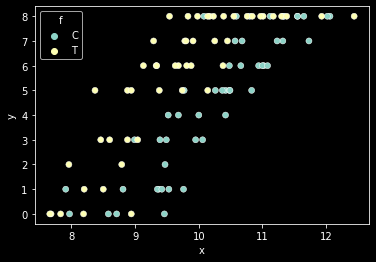

In [6]:

# 散布図
# https://engineeeer.com/pandas-dataframe-scatterplot/
sns.scatterplot(x='x', y='y', hue='f', data=df)

上の散布図をみると、
- 体サイズ$x_i$が大きくなると、生存種子数$y_i$が多くなるらしい
- 肥料を与えると生存種子数$y_i$が多くなるらしい

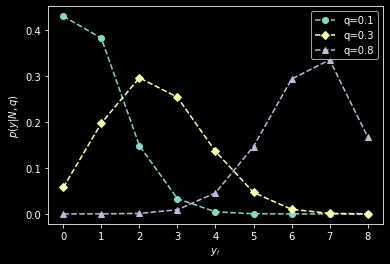

In [12]:
# 二項分布
# N個の中から$$y_i個とって、生存確率がqの割合？

y = np.arange(0, 9)
plt.plot(pd.Series(binom.pmf(y, 8, 0.1), index=y), 'o--', label='q=0.1')
plt.plot(pd.Series(binom.pmf(y, 8, 0.3), index=y), 'D--', label='q=0.3')
plt.plot(pd.Series(binom.pmf(y, 8, 0.8), index=y), '^--', label='q=0.8')
plt.legend(loc='upper right')
plt.xlabel('$y_{i}$')
plt.ylabel('$p (y | N, q)$')
plt.show()

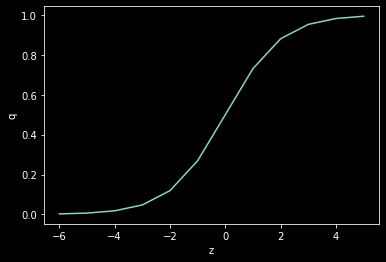

In [5]:
# ロジスティック曲線
z_list = np.arange(-6, 6)
q_list = list(map(lambda z: 1 / (1+math.exp(-z)), z_list))
plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

$z_i$は線型予測子$z_i=\beta_1+\beta_2 x_i + ...$

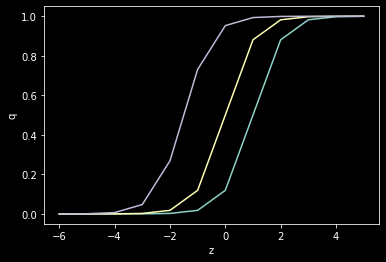

In [17]:
# beta2 = 2でbeta1が2, 0, -3の時
beta2 = 2
beta1_list = [2, 0, -3]
z_list = np.arange(-6, 6)
for beta1 in beta1_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

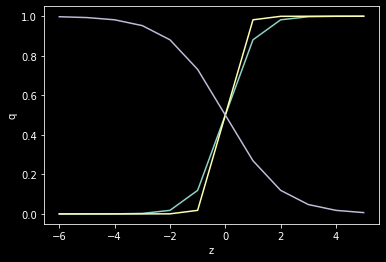

In [19]:
# beta1=0でbeta2が2,4,-1の時
beta1 = 0
beta2_list = [2,4,-1]
z_list = np.arange(-6, 6)
for beta2 in beta2_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

生存確率$q_i$が体サイズ$x_i$にだけ依存していると仮定すると線型予測子は$z_i=\beta_1+\beta_2x_i$になる。
この時の$q_i$と$x_i$の関係がパラメータ$\beta_1,\beta_2$に依存している様子を上記グラフ達が示している。

ロジスティック関数の

$q_i=\frac{1}{1+exp(-z_i)}$

を変形すると

$log\frac{q_i}{1-q_i} = z_i$

となる。この左辺のことをロジット関数(logit function)という

$logit(q_i) = log \frac{q_i}{1-q_i}$

ロジット関数はロジスティック関数の逆関数であり、ロジスティック関数の逆関数がロジット関数。